#  Práctica Obligatoria - Parte I - Dataset

***<p style="text-align:center;">Aprendizaje Automático II</p>***
***<p style="text-align:center;">German Traffic Signs</p>***

En este Notebook se resumen las características del *dataset* a utilizar a lo largo de la práctica.

### German Traffic Sign (GTS)

El **German Traffic Sign** es un dataset ampliamente utilizado en tareas de clasificación y reconocimiento de señales de tráfico. 

---

#### **Características del Dataset**
- **Cantidad de clases:** 43 clases de señales de tráfico, que incluyen límites de velocidad, prohibiciones, advertencias y otros tipos de señales.
- **Número de imágenes:** Alrededor de 50,000 imágenes para entrenamiento y validación, y aproximadamente 12,000 imágenes para prueba.
- **Dimensiones de las imágenes:** Resoluciones variables, típicamente entre 15x15 y 250x250 píxeles.
- **Formato de los datos:**
  - Cada imagen viene etiquetada con su clase correspondiente.
  - Metadatos como tamaño de la imagen, coordenadas del ROI (Región de Interés) y nombre de archivo están disponibles en archivos CSV.
  
---

#### **Licencia**
El dataset es de uso libre para fines educativos y de investigación.

Más información está disponible en el sitio oficial del benchmark: [GTSRB Dataset](http://benchmark.ini.rub.de/).

--- 

#### **Práctica**

En el contexto de esta práctica, se proporciona una adaptación de dicho conjunto de datos. 

En particular, se proporcionan los datasets (`Dataset`) de PyTorch para trabajar con ellos.

### Evaluación - 1.5/10 puntos

Puntuación de cada parte sobre el total de la práctica:
- **[Ejercicio 1]** 0.5 puntos.
- **[Ejercicio 2]** 1 punto.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import transforms

from gts_dataset import GTS

El conjunto de datos a utilizar será dividido en 3 partes:

In [2]:
# Definir las transformaciones y conversión a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = GTS(csv_file='train.csv', root_dir='./data', transform=transform)
valid_dataset = GTS(csv_file='valid.csv', root_dir='./data', transform=transform)
test_dataset = GTS(csv_file='test.csv', root_dir='./data', transform=transform)

Es decir, deberás utilizar siempre los conjuntos:
* `train_dataset`
* `valid_dataset`
* `test_dataset`

Dados estos tres conjuntos:
1. Cuenta cuántos ejemplos hay en cada uno.
2. Comprueba que, efectivamente, existen 43 clases.
3. Comprueba que las dimensiones de las imágenes son: 25x25x3.
4. Crea una función `visualize_subset(dataset, num_images)` que visualice un número dado de imágenes.

**[Ejercicio 1]**

In [6]:
##################### COMPLETAR #######################
# 1. 
# Número de ejemplos en los conjuntos de entrenamiento y validación
num_train = len(train_dataset)
num_valid = len(valid_dataset)
num_test = len(test_dataset)

print("----------------------------------------------------------")
print(f"Número de ejemplos en el conjunto de entrenamiento: {num_train}")
print(f"Número de ejemplos en el conjunto de validación: {num_valid}")
print(f"Número de ejemplos en el conjunto de test: {num_test}")


##################### COMPLETAR #######################
# 2.
num_clases = len(train_dataset.data.iloc[:, 1].unique())

print(f"Número de clases en el dataset: {num_clases}")

##################### COMPLETAR #######################
# 3.

image_size = train_dataset[0][0].shape
print(f"Tamaño de las imágenes: {image_size}")
print("----------------------------------------------------------")

##################### COMPLETAR #######################
# 4.
# Visualizar algunos ejemplos
def visualize_subset(dataset, num_images=6):
    """
    Visualiza ejemplos directamente de un Subset o Dataset.
    
    :param dataset: Dataset o Subset que contiene las imágenes y etiquetas.
    :param num_images: Número de imágenes a mostrar.
    """
    indices = np.arange(num_images)
    images = []
    labels = []
    
    for idx in indices:
        image, label = dataset[idx]
        images.append(image)
        labels.append(label)
    
    images = torch.stack(images)     # Convertir la lista de imágenes en un tensor
    images =  images.permute(0, 2, 3, 1)    # Permutar dimensiones para visualizar (batch, h, w, c)


    # Mostrar imágenes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for idx in range(num_images):
        axes[idx].imshow(images[idx])
        axes[idx].set_title(f"Clase: {labels[idx]}")
        axes[idx].axis('off')
    plt.tight_layout()
    plt.show()


# Visualizar ejemplos del conjunto de entrenamiento
visualize_subset(train_dataset)


----------------------------------------------------------
Número de ejemplos en el conjunto de entrenamiento: 19604
Número de ejemplos en el conjunto de validación: 19605
Número de ejemplos en el conjunto de test: 12630
Número de clases en el dataset: 43
Tamaño de las imágenes: torch.Size([3, 25, 25])
----------------------------------------------------------


Ahora que tienes acceso a los datos, crea un histograma de las clases para comprobar si están o no desbalanceadas:

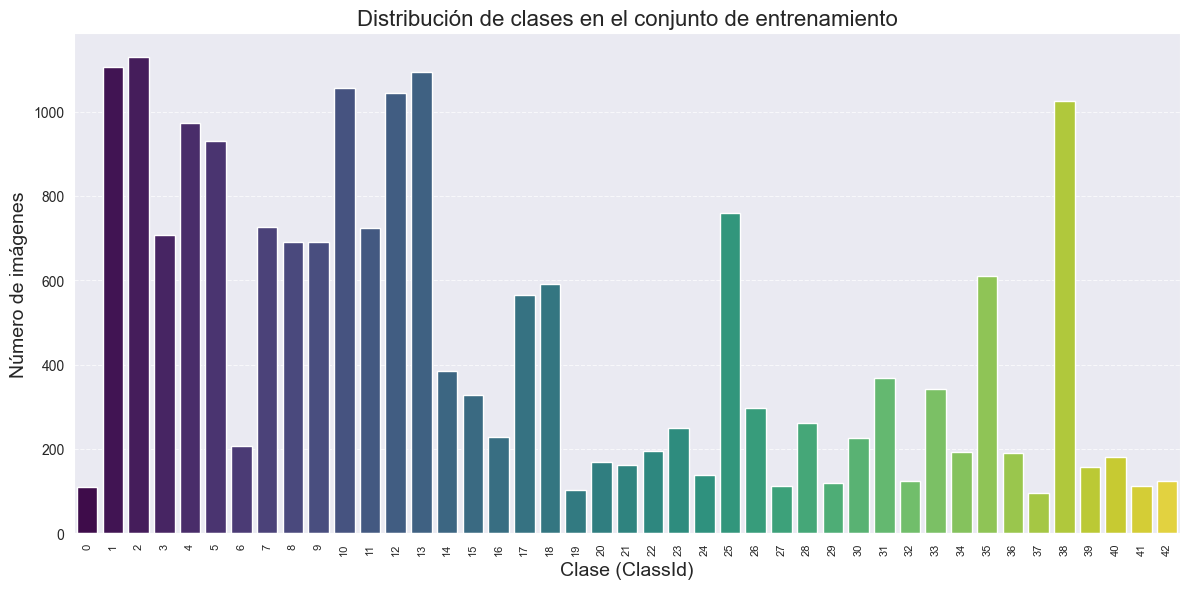

In [7]:
##################### COMPLETAR #######################
# Crear un histograma
# Extraemos la columna de etiquetas (índice 1) del dataframe interno del dataset
train_labels = train_dataset.data.iloc[:, 1]

plt.figure(figsize=(12, 6))
# Usamos seaborn para un conteo rápido y estético
sns.countplot(x=train_labels, palette="viridis", legend=False, hue=train_labels)

# Personalización del gráfico
plt.title('Distribución de clases en el conjunto de entrenamiento', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Número de imágenes', fontsize=14)

# Rotamos las etiquetas del eje X si se ven muy amontonadas (opcional, pero útil con 43 clases)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout() # Ajusta los márgenes para que no se corten las etiquetas
plt.show()

################### Fin COMPLETAR #####################

Como puedes comprobar, las clases de este dataset están fuertemente desbalanceadas. Para paliar este posible problema, puedes crear un `sampler` específico y usarlo en el `dataloader`.

Ayúdate de la documentación de `WeightedRandomSampler`, para obtener un `dataloader` de manera que las clases tengan la misma probabilidad de ser muestreadas.

**[Ejercicio 2]**

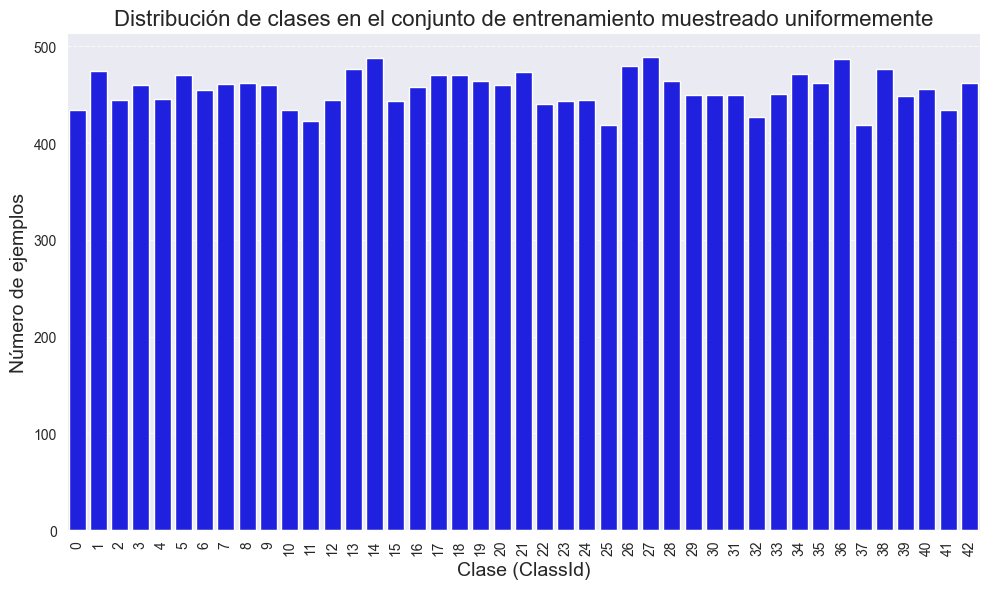

In [8]:
from torch.utils.data import WeightedRandomSampler

##################### COMPLETAR #######################
batch_size = 16

# Paso 1: Calcular el histograma (frecuencias por clase)
histograma, _ = np.histogram(train_dataset.data.iloc[:, 1], bins=range(44))

# Paso 2: Asignar pesos inversamente proporcionales a las frecuencias
class_weights = 1.0 / histograma

# Paso 3: Asignar pesos a cada ejemplo del dataset
labels = train_dataset.data.iloc[:, 1].values
sample_weights = class_weights[labels] # cada ejemplo debe tener un peso asociado

# Paso 4: Crear el WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Paso 5: Crear el DataLoader con el sampler
train_dataloader_uniform = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)

################### Fin COMPLETAR #####################
# Crear un contador para las clases sampleadas
sampled_labels = []

# Samplear las etiquetas usando el sampler
for data_batch, label_batch in train_dataloader_uniform:
    sampled_labels.extend(label_batch.numpy())

# Convertir las etiquetas sampleadas a un tensor y calcular el histograma
sampled_labels = torch.tensor(sampled_labels)
sampled_histogram = torch.bincount(sampled_labels)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(sampled_histogram))), y=sampled_histogram.numpy(), color='blue')

# Personalización del gráfico
plt.title('Distribución de clases en el conjunto de entrenamiento muestreado uniformemente', fontsize=16)
plt.xlabel('Clase (ClassId)', fontsize=14)
plt.ylabel('Número de ejemplos', fontsize=14)
plt.xticks(ticks=range(len(sampled_histogram)), rotation=90)  # Mostrar todas las clases en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El sampler ha equilibrado con éxito las 43 clases, eliminando el sesgo hacia las señales más comunes. Ahora el modelo aprenderá con la misma importancia tanto las señales frecuentes como las raras, mejorando su capacidad de generalización.